In [8]:
from typing import TypedDict, Literal, Optional

from langgraph.graph import StateGraph, START, END

In [ ]:
class HRRecruitingState(TypedDict):
    position: str
    jd: Optional[str]
    jd_approved: Optional[bool]
    jd_suggestions: Optional[str]
    job_posted: Optional[bool]
    resume_reviewed: Optional[bool]
    application_threshhold: Optional[int]
    current_number_of_application: Optional[int]
    offer_sent: Optional[bool]
    status: Optional[Literal[
        "received_position", "jd_created", "jd_approved", "job_posted", "resume_reviewed", "offer_sent"
    ]]

In [ ]:
# Dummy functions for each step
def get_position(state):
    print(f"Received position: {state['position']}")
    return state

def make_jd(state):
    suggestion = state.get('jd_suggestions', '')
    state['jd'] = f"Job Description for {state['position']}. {suggestion}"
    print(f"Generated JD: {state['jd']}")
    return state

def approve_jd(state):
    # Dummy approval logic (simulate user input)
    state['jd_approved'] = True  # Change to True to simulate approval
    return state


def jd_suggestions(state):
    # Dummy suggestion logic
    state['jd_suggestions'] = "Include experience with Python and AI."
    print(f"JD suggestions: {state['jd_suggestions']}")
    return state


def post_job(state):
    state['job_posted'] = True
    print(f"Posted job for: {state['position']}")
    return state

def check_application_threshold(state):
    # Dummy logic to check if application threshold is met
    state['application_threshhold'] = 5  # Assume we need at least 5 applications
    print(f"Application threshold set to: {state['application_threshhold']}")
    return state


def review_resume(state):
    state['resume_reviewed'] = True
    print("Reviewed resumes.")
    return state

def send_offer(state):
    state['offer_sent'] = True
    print("Sent offer letter.")
    return state



In [24]:
# Build the graph
graphBuilder = StateGraph(HRRecruitingState)

graphBuilder.add_node("get_position", get_position)
graphBuilder.add_node("make_jd", make_jd)
graphBuilder.add_node("approve_jd", approve_jd)
graphBuilder.add_node("jd_suggestions", jd_suggestions)
graphBuilder.add_node("post_job", post_job)
graphBuilder.add_node("review_resume", review_resume)
graphBuilder.add_node("send_offer", send_offer)

graphBuilder.add_edge(START, "get_position")

graphBuilder.add_edge("get_position", "make_jd")
graphBuilder.add_conditional_edges("make_jd",
    approve_jd,
    {
    True: "post_job",
    False: "jd_suggestions"
    }
)
graphBuilder.add_edge("jd_suggestions", "make_jd")
graphBuilder.add_edge("approve_jd", "post_job")
# graphBuilder.add_edge("make_jd", "post_job")
graphBuilder.add_edge("post_job", "review_resume")
graphBuilder.add_edge("review_resume", "send_offer")

graphBuilder.add_edge("send_offer", END)

graph = graphBuilder.compile()


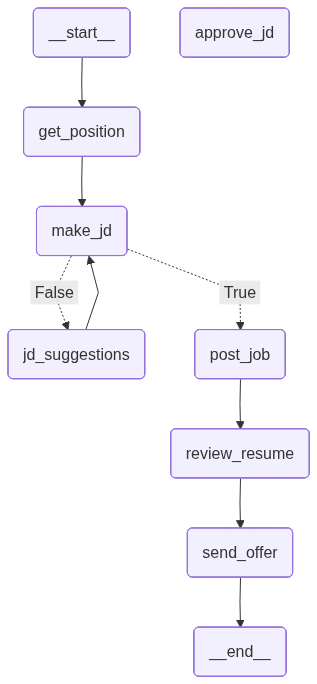

In [25]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))